In [2]:
import numpy as np
import matplotlib
from matplotlib import colormaps
import matplotlib.pyplot as plt
import healpy as hp
import itertools

(3, 49152)
(49152,)
dir shape: (3, 49152)
v shape: (3, 1)
vperp shape: (3, 1)


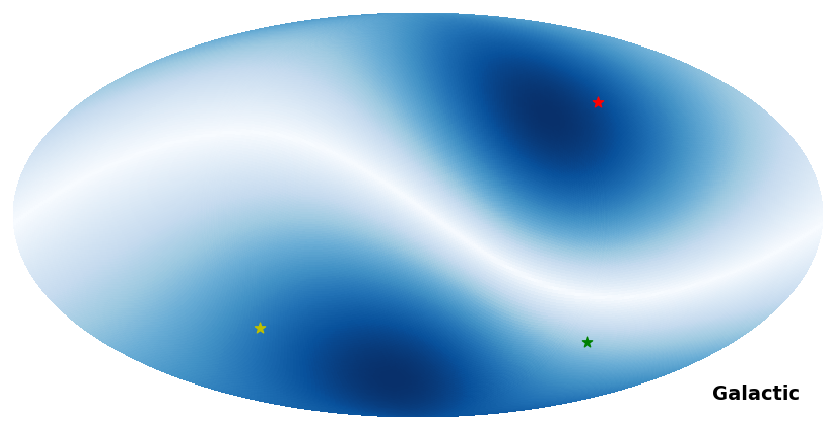

In [9]:
def skyvec(theta,phi): #unit vector
    ct = np.cos(theta)
    st = np.sin(theta)
    cp = np.cos(phi)
    sp = np.sin(phi)
    return np.array([st*cp,st*sp,ct]) #hp.ang2vec(theta,phi).T 

# some useful functions

def vecdot(vec1,vec2): # (N,3) vectors
    vec1 = np.atleast_2d(vec1)
    vec2 = np.atleast_2d(vec2)
    dot = np.sum(vec1*vec2,axis=0)
    return dot

def veccross(vec1,vec2):
    vec1 = np.atleast_2d(vec1)
    vec2 = np.atleast_2d(vec2)
    cross = np.cross(vec1,vec2,axis=0)
    return cross

def gammadipole_V(v,p,q):
    pxq = veccross(p,q)
    pdotq = vecdot(p,q)
    print(np.shape(pxq))
    pq = (1-pdotq)/2
    fac = -(1/3 + pq*np.log(pq)/(4*(1-pq)) )
    print(np.shape(fac))
    return fac*vecdot(v,pxq) # factor of 4 to match GT notation

nside = 64
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
dir = skyvec(theta,phi)


theta0 = np.deg2rad(48) # In galactic coordinates
phi0 = np.deg2rad(264) # In galactic coordinates
v = skyvec(theta0,phi0).reshape(3,1)
vm = -1.*np.array(v)
theta0m, phi0m = hp.vec2ang(vm)

vperp = np.array([ np.cos(phi0)*np.cos(theta0),np.sin(phi0)*np.cos(theta0),-np.sin(theta0)]).reshape(3,1)

thetap, phip = hp.vec2ang(vperp)

dmap_t = gammadipole_V(v,dir,vperp)


print('dir shape:',np.shape(dir))
print('v shape:',np.shape(v))
print('vperp shape:',np.shape(vperp))


hp.mollview(abs(dmap_t),title='',cmap='Blues',cbar=False,coord=['E','G'])
hp.projscatter(theta0,phi0,marker='*',s=60,color='r')
hp.projscatter(theta0m,phi0m,marker='*',s=60,color='y')
hp.projscatter(thetap,phip,marker='*',s=60,color='g')


In [7]:
print(p)

[[ 0.03607264 -0.03607264 -0.03607264 ... -0.03607264 -0.03607264
   0.03607264]
 [ 0.03607264  0.03607264 -0.03607264 ...  0.03607264 -0.03607264
  -0.03607264]
 [ 0.99869792  0.99869792  0.99869792 ... -0.99869792 -0.99869792
  -0.99869792]]
